# 무신사 랭킹 데이터 분석

무신사 전체 카테고리 상위 100개 상품에 대한 데이터 분석

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from matplotlib import font_manager, rc
import platform

# 한글 폰트 설정 (운영체제별로 다르게 설정)
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

# 시각화 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [9]:
# 데이터 로드
df = pd.read_excel('../data/musinsa_ranking_precise.xlsx')
print(f"데이터 shape: {df.shape}")
print("\n컬럼 정보:")
print(df.columns.tolist())
print("\n데이터 미리보기:")
df.head()

데이터 shape: (100, 11)

컬럼 정보:
['순위', '상품URL', '크롤링시간', '브랜드명', '상품명', '카테고리', '현재가격', '원가', '할인율', '평점', '리뷰수']

데이터 미리보기:


,순위,상품URL,크롤링시간,브랜드명,상품명,카테고리,현재가격,원가,할인율,평점,리뷰수
0,1,https://www.musinsa.com/products/957758,2025-07-27 01:22:18,반스,컴피쿠시 올드스쿨 - (클래식) 블랙:트루 화이트/VN0A3WMAVNE1,신발\n스니커즈\n캔버스/단화\n(반스),"48,990원","89,000원",45%,4.9,"후기 12,191개"
1,2,https://www.musinsa.com/products/3999802,2025-07-27 01:22:30,아디다스,파이어버드 트랙탑 - 인디고 / IR9893,아우터\n트레이닝 재킷\n(아디다스),"94,990원","119,000원",20%,4.9,후기 529개
2,3,https://www.musinsa.com/products/3514185,2025-07-27 01:22:35,블리스텍스,[2PACK][사은품증정]스트라이덱스 BHA 바하 폼클렌저 150ml,뷰티\n클렌징/필링\n클렌징폼/젤/비누\n클렌징폼\n(블리스텍스),"13,200원","19,800원",33%,4.9,후기 914개
3,4,https://www.musinsa.com/products/1926048,2025-07-27 01:22:50,제로,Deep One Tuck Sweat Shorts [Grey],바지\n숏 팬츠\n(제로),"27,200원","32,000원",15%,4.9,"후기 61,972개"
4,5,https://www.musinsa.com/products/1926034,2025-07-27 01:22:42,제로,Deep One Tuck Sweat Shorts [Black],바지\n숏 팬츠\n(제로),"27,200원","32,000원",15%,4.9,"후기 21,917개"


In [10]:
# 기본 통계 정보
print("기본 통계 정보:")
df.describe()

기본 통계 정보:


,순위,평점
count,100.000000,95.000000
mean,50.500000,4.848421
std,29.011492,0.095498
min,1.000000,4.300000
25%,25.750000,4.800000
50%,50.500000,4.900000
75%,75.250000,4.900000
max,100.000000,5.000000


## 1. 브랜드 분석

/var/folders/1y/j2dh28ns75q9ysvxt192rmcc0000gn/T/ipykernel_11056/2138211035.py:15: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  plt.tight_layout()
/var/folders/1y/j2dh28ns75q9ysvxt192rmcc0000gn/T/ipykernel_11056/2138211035.py:15: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.
  plt.tight_layout()
/var/folders/1y/j2dh28ns75q9ysvxt192rmcc0000gn/T/ipykernel_11056/2138211035.py:15: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  plt.tight_layout()
/var/folders/1y/j2dh28ns75q9ysvxt192rmcc0000gn/T/ipykernel_11056/2138211035.py:15: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
/var/folders/1y/j2dh28ns75q9ysvxt192rmcc0000gn/T/ipykernel_11056/2138211035.py:15: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  plt.tight_layout()
/var/folders/1y/j2dh28ns75q9ysvxt192rmcc0000gn/T/ipykernel_11056/2138211035.py:15: UserWarning:

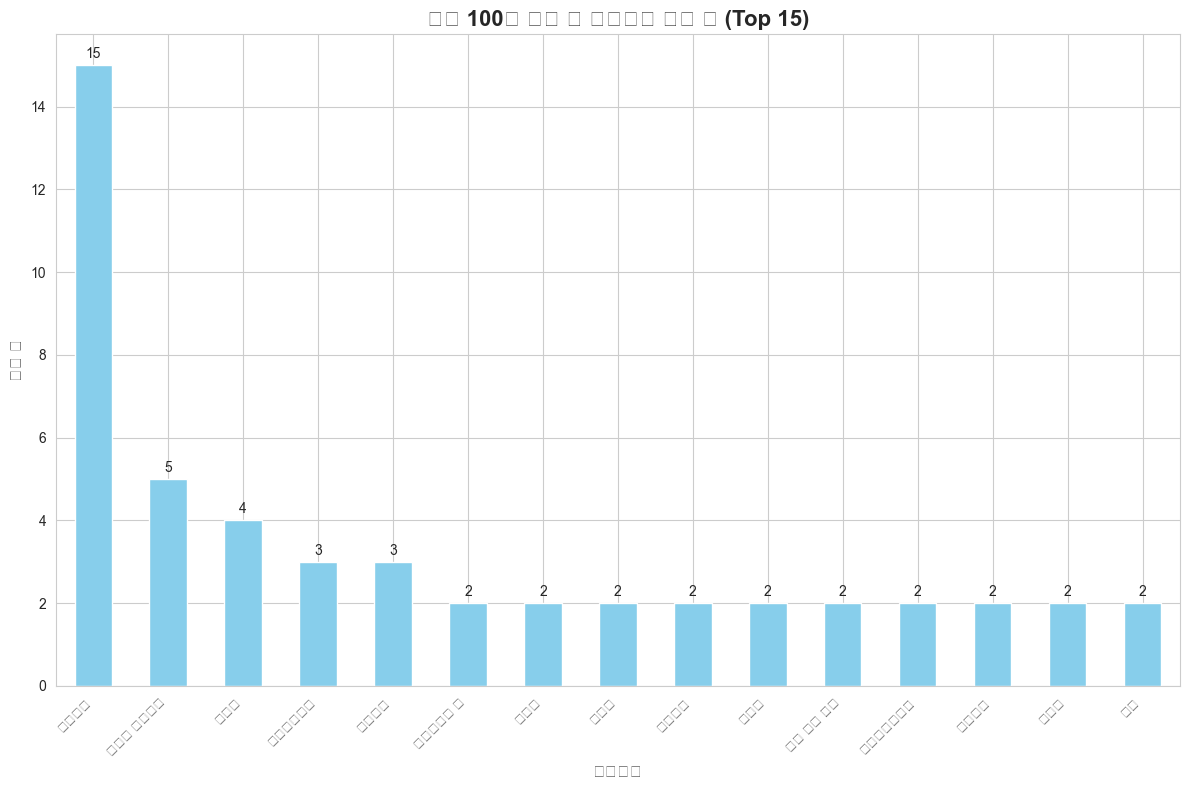


가장 많은 상품을 보유한 브랜드: 아디다스 (15개)


In [11]:
# 브랜드별 상품 수 Top 15
brand_counts = df['브랜드명'].value_counts().head(15)

plt.figure(figsize=(12, 8))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('상위 100개 상품 중 브랜드별 상품 수 (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('브랜드명', fontsize=12)
plt.ylabel('상품 수', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 값 표시
for i, v in enumerate(brand_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n가장 많은 상품을 보유한 브랜드: {brand_counts.index[0]} ({brand_counts.values[0]}개)")

## 2. 가격 분석

In [ ]:
# 가격 데이터 전처리 (문자열에서 숫자로 변환)
df['현재가격_숫자'] = df['현재가격'].str.replace('원', '').str.replace(',', '').astype(int)
df['원가_숫자'] = df['원가'].str.replace('원', '').str.replace(',', '').astype(int)
df['할인율_숫자'] = df['할인율'].str.replace('%', '').fillna('0').astype(int)

# 가격 분포 히스토그램
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['현재가격_숫자'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('현재 가격 분포', fontsize=14, fontweight='bold')
plt.xlabel('가격 (원)', fontsize=12)
plt.ylabel('상품 수', fontsize=12)

plt.subplot(1, 2, 2)
plt.boxplot(df['현재가격_숫자'])
plt.title('현재 가격 박스플롯', fontsize=14, fontweight='bold')
plt.ylabel('가격 (원)', fontsize=12)

plt.tight_layout()
plt.show()

print(f"평균 가격: {df['현재가격_숫자'].mean():,.0f}원")
print(f"중간값: {df['현재가격_숫자'].median():,.0f}원")
print(f"최저가: {df['현재가격_숫자'].min():,.0f}원")
print(f"최고가: {df['현재가격_숫자'].max():,.0f}원")

In [ ]:
# 가격대별 상품 분포
price_ranges = ['0-3만원', '3-5만원', '5-10만원', '10-20만원', '20만원 이상']
price_counts = pd.cut(df['현재가격_숫자'], 
                      bins=[0, 30000, 50000, 100000, 200000, float('inf')],
                      labels=price_ranges).value_counts()

plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(range(len(price_counts)))
plt.pie(price_counts.values, labels=price_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('가격대별 상품 분포', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

## 3. 할인율 분석

In [ ]:
# 할인율 분포
plt.figure(figsize=(12, 6))

# 할인 상품만 필터링
discounted_items = df[df['할인율_숫자'] > 0]

plt.subplot(1, 2, 1)
plt.hist(discounted_items['할인율_숫자'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('할인율 분포 (할인 상품만)', fontsize=14, fontweight='bold')
plt.xlabel('할인율 (%)', fontsize=12)
plt.ylabel('상품 수', fontsize=12)

plt.subplot(1, 2, 2)
discount_categories = ['할인 없음', '1-10%', '11-30%', '31-50%', '50% 이상']
discount_counts = pd.cut(df['할인율_숫자'], 
                        bins=[-1, 0, 10, 30, 50, 100],
                        labels=discount_categories).value_counts()

discount_counts.plot(kind='bar', color='lightgreen')
plt.title('할인율 구간별 상품 수', fontsize=14, fontweight='bold')
plt.xlabel('할인율 구간', fontsize=12)
plt.ylabel('상품 수', fontsize=12)
plt.xticks(rotation=45)

# 값 표시
for i, v in enumerate(discount_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"할인 상품 비율: {(df['할인율_숫자'] > 0).sum() / len(df) * 100:.1f}%")
print(f"평균 할인율 (할인 상품만): {discounted_items['할인율_숫자'].mean():.1f}%")

## 4. 평점 및 리뷰 분석

In [ ]:
# 리뷰수 데이터 전처리
df['리뷰수_숫자'] = df['리뷰수'].str.extract('(\d+(?:,\d+)*)').iloc[:, 0].str.replace(',', '').astype(int)

# 평점 분포
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
rating_items = df[df['평점'] > 0]
plt.hist(rating_items['평점'], bins=20, color='gold', edgecolor='black', alpha=0.7)
plt.title('평점 분포', fontsize=14, fontweight='bold')
plt.xlabel('평점', fontsize=12)
plt.ylabel('상품 수', fontsize=12)

plt.subplot(1, 2, 2)
# 리뷰 수와 평점의 관계
plt.scatter(df['리뷰수_숫자'], df['평점'], alpha=0.6, color='purple')
plt.title('리뷰 수와 평점의 관계', fontsize=14, fontweight='bold')
plt.xlabel('리뷰 수', fontsize=12)
plt.ylabel('평점', fontsize=12)
plt.xscale('log')  # 로그 스케일 적용

plt.tight_layout()
plt.show()

print(f"평균 평점: {rating_items['평점'].mean():.2f}")
print(f"평균 리뷰 수: {df['리뷰수_숫자'].mean():.0f}개")

## 5. 상위 순위 상품 특성 분석

In [ ]:
# 상위 20위 vs 나머지 비교
top20 = df.iloc[:20]
others = df.iloc[20:]

comparison_data = pd.DataFrame({
    '상위 20위': [
        top20['현재가격_숫자'].mean(),
        top20['할인율_숫자'].mean(),
        top20['평점'].mean(),
        top20['리뷰수_숫자'].mean()
    ],
    '21-100위': [
        others['현재가격_숫자'].mean(),
        others['할인율_숫자'].mean(),
        others['평점'].mean(),
        others['리뷰수_숫자'].mean()
    ]
}, index=['평균 가격', '평균 할인율', '평균 평점', '평균 리뷰수'])

# 정규화를 위해 각 지표를 0-1 범위로 스케일링
normalized_data = comparison_data.copy()
for idx in comparison_data.index:
    max_val = comparison_data.loc[idx].max()
    if max_val > 0:
        normalized_data.loc[idx] = comparison_data.loc[idx] / max_val

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
normalized_data.plot(kind='bar', ax=ax1, color=['coral', 'skyblue'])
ax1.set_title('상위 20위 vs 21-100위 비교 (정규화)', fontsize=14, fontweight='bold')
ax1.set_xlabel('지표', fontsize=12)
ax1.set_ylabel('정규화된 값', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend()

# 실제 값 표시 테이블
ax2.axis('tight')
ax2.axis('off')
table_data = []
for idx in comparison_data.index:
    if idx == '평균 가격':
        row = [idx, f"{comparison_data.loc[idx, '상위 20위']:,.0f}원", 
               f"{comparison_data.loc[idx, '21-100위']:,.0f}원"]
    elif idx == '평균 할인율':
        row = [idx, f"{comparison_data.loc[idx, '상위 20위']:.1f}%", 
               f"{comparison_data.loc[idx, '21-100위']:.1f}%"]
    elif idx == '평균 평점':
        row = [idx, f"{comparison_data.loc[idx, '상위 20위']:.2f}", 
               f"{comparison_data.loc[idx, '21-100위']:.2f}"]
    else:
        row = [idx, f"{comparison_data.loc[idx, '상위 20위']:,.0f}개", 
               f"{comparison_data.loc[idx, '21-100위']:,.0f}개"]
    table_data.append(row)

table = ax2.table(cellText=table_data, 
                  colLabels=['지표', '상위 20위', '21-100위'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
ax2.set_title('실제 값 비교', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. 브랜드별 평균 가격 및 할인율

In [ ]:
# 상위 10개 브랜드의 평균 가격과 할인율
top_brands = df['브랜드명'].value_counts().head(10).index
brand_analysis = df[df['브랜드명'].isin(top_brands)].groupby('브랜드명').agg({
    '현재가격_숫자': 'mean',
    '할인율_숫자': 'mean',
    '평점': 'mean',
    '리뷰수_숫자': 'mean'
}).round(2)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 평균 가격
brand_analysis['현재가격_숫자'].sort_values(ascending=False).plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('브랜드별 평균 가격', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('브랜드', fontsize=12)
axes[0,0].set_ylabel('평균 가격 (원)', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)

# 평균 할인율
brand_analysis['할인율_숫자'].sort_values(ascending=False).plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('브랜드별 평균 할인율', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('브랜드', fontsize=12)
axes[0,1].set_ylabel('평균 할인율 (%)', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45)

# 평균 평점
brand_analysis['평점'].sort_values(ascending=False).plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('브랜드별 평균 평점', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('브랜드', fontsize=12)
axes[1,0].set_ylabel('평균 평점', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=45)

# 평균 리뷰수
brand_analysis['리뷰수_숫자'].sort_values(ascending=False).plot(kind='bar', ax=axes[1,1], color='coral')
axes[1,1].set_title('브랜드별 평균 리뷰수', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('브랜드', fontsize=12)
axes[1,1].set_ylabel('평균 리뷰수', fontsize=12)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. 주요 인사이트 및 결론

In [ ]:
# 주요 인사이트 출력
print("=== 무신사 랭킹 데이터 분석 주요 인사이트 ===")
print()
print("1. 브랜드 분석")
print(f"   - 가장 많은 상품을 보유한 브랜드: {df['브랜드명'].value_counts().index[0]}")
print(f"   - 상위 100개 중 {len(df['브랜드명'].unique())}개의 브랜드가 진입")
print()
print("2. 가격 분석")
print(f"   - 평균 가격: {df['현재가격_숫자'].mean():,.0f}원")
print(f"   - 가격 범위: {df['현재가격_숫자'].min():,.0f}원 ~ {df['현재가격_숫자'].max():,.0f}원")
print(f"   - 5만원 이하 상품 비율: {(df['현재가격_숫자'] <= 50000).sum() / len(df) * 100:.1f}%")
print()
print("3. 할인 분석")
print(f"   - 할인 상품 비율: {(df['할인율_숫자'] > 0).sum() / len(df) * 100:.1f}%")
print(f"   - 평균 할인율 (할인 상품만): {df[df['할인율_숫자'] > 0]['할인율_숫자'].mean():.1f}%")
print(f"   - 30% 이상 할인 상품: {(df['할인율_숫자'] >= 30).sum()}개")
print()
print("4. 고객 반응")
print(f"   - 평균 평점: {df[df['평점'] > 0]['평점'].mean():.2f}점")
print(f"   - 평균 리뷰수: {df['리뷰수_숫자'].mean():.0f}개")
print(f"   - 리뷰 1000개 이상 상품: {(df['리뷰수_숫자'] >= 1000).sum()}개")
print()
print("5. 상위 순위 특징")
print(f"   - Top 20 평균 가격: {df.iloc[:20]['현재가격_숫자'].mean():,.0f}원")
print(f"   - Top 20 평균 리뷰수: {df.iloc[:20]['리뷰수_숫자'].mean():,.0f}개")